In [4]:
#uploaded the dataset files to drive so mounting the drive here
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#unzipping the dataset files which are uploaded in the drive by giving the dataset file
!unzip /content/drive/MyDrive/train.csv.zip

Archive:  /content/drive/MyDrive/train.csv.zip
  inflating: train.csv               


In [6]:
#unzipping the dataset files which are uploaded in the drive by giving the dataset file
!unzip /content/drive/MyDrive/test.csv.zip

Archive:  /content/drive/MyDrive/test.csv.zip
  inflating: test.csv                


In [7]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#importing regular expression 
import re
#importing tensorflow modules
import tensorflow 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras import regularizers
import os
#importing the nltk modules
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
#importing stemming amd lemmatizer modules 
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn import preprocessing
from gensim.models import Word2Vec
from gensim.parsing.preprocessing import preprocess_string, strip_tags, strip_punctuation, remove_stopwords, strip_numeric, stem_text
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
#importing linear regression modules
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from imblearn.over_sampling import RandomOverSampler


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [8]:
#Installing latest version
!pip install tensorflow==1.14.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109.3 MB 56 kB/s 
     |████████████████████████████████| 50 kB 8.4 MB/s 
     |████████████████████████████████| 488 kB 55.0 MB/s 
     |████████████████████████████████| 3.1 MB 56.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour i

In [9]:
#checking the version
print(tensorflow.__version__)

2.9.2


In [10]:
#uninstalling the old version
!pip uninstall numpy
#installing the latest version
!pip install numpy

Found existing installation: numpy 1.21.6
Uninstalling numpy-1.21.6:
  Would remove:
    /usr/bin/f2py
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.7
    /usr/local/lib/python3.7/dist-packages/numpy-1.21.6.dist-info/*
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libopenblasp-r0-2d23e62b.3.17.so
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.7/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.21.6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.7 MB 7.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tenso

In [11]:
#checking the version type
np.__version__

'1.21.6'

In [12]:
#training the train.csv file
train_df = pd.read_csv('/content/train.csv')
#testing the test.csv file
test_df = pd.read_csv('/content/test.csv')


In [13]:
#checking the null values in the training file and printing them
print(train_df.isnull().sum())


ID                      0
TITLE                   0
ABSTRACT                0
Computer Science        0
Physics                 0
Mathematics             0
Statistics              0
Quantitative Biology    0
Quantitative Finance    0
dtype: int64


In [35]:
print(train_df.columns)

Index(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance',
       'train_or_test'],
      dtype='object')


In [14]:
#targetting the required columns that we need and conveting them in to category
target_cols = ['Computer Science', 'Physics', 'Mathematics','Statistics', 'Quantitative Biology', 'Quantitative Finance']

In [15]:
y_data = train_df[target_cols]

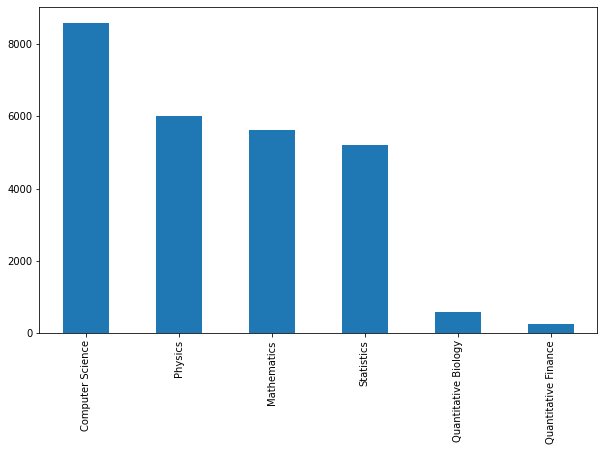

In [16]:
#data visualization based on categories
plt.figure(figsize=(10,6))
y_data.sum(axis=0).plot.bar()
plt.show()

In [17]:
#preparing the data by using stemming and lemmatization and also pre processing the data
porter = PorterStemmer()
wnl = WordNetLemmatizer()

class DataPreprocess:
    
    def __init__(self):
        self.filters = [strip_tags,
                       strip_numeric,
                       strip_punctuation,
                       lambda x: x.lower(),
                       lambda x: re.sub(r'\s+\w{1}\s+', '', x),
                       remove_stopwords]
    def __call__(self, doc):
        clean_words = self.__apply_filter(doc)
        return clean_words
    def __apply_filter(self, doc):
        try:
            cleanse_words = set(preprocess_string(doc, self.filters))
            return ' '.join(cleanse_words)
        except TypeError as te:
            raise(TypeError("Not a valid data {}".format(te)))
  

In [18]:
#in order to pre process the data we are combining the test dataset and train dataset
train_df['train_or_test'] = 0
test_df['train_or_test'] = 1

feature_col = ['ID', 'TITLE', 'ABSTRACT', 'train_or_test']

In [19]:
combined_set = pd.concat([train_df[feature_col], test_df[feature_col]])
combined_set

,ID,TITLE,ABSTRACT,train_or_test
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,0
...,...,...,...,...
8984,29957,Supporting mixed-datatype matrix multiplicatio...,We approach the problem of implementing mixe...,1
8985,29958,An axiomatic basis for Blackwell optimality,In the theory of Markov decision processes (...,1
8986,29959,GeneVis - An interactive visualization tool fo...,GeneVis is a web-based tool to visualize com...,1
8987,29960,Quantifying the causal effect of speed cameras...,This paper quantifies the effect of speed ca...,1


In [20]:
#merging the title and abstract columns in to text in order to reduce the extra columns
combined_set['TEXT'] = combined_set['TITLE'] + combined_set['ABSTRACT']
combined_set = combined_set.drop(['TITLE', 'ABSTRACT'], axis=1)

In [21]:
#applying the data pre process for the text data
combined_set['Processed'] = combined_set['TEXT'].apply(DataPreprocess())


In [22]:
combined_set.columns

Index(['ID', 'train_or_test', 'TEXT', 'Processed'], dtype='object')

In [23]:
train_set = combined_set.loc[combined_set['train_or_test'] == 0]
test_set = combined_set.loc[combined_set['train_or_test'] == 1]
#dropping the key reference values
train_set = train_set.drop('train_or_test', axis=1)
test_set = test_set.drop('train_or_test', axis=1)

In [24]:
#printing the first two arrays
train_set[0:2].values

array([[1,
        "Reconstructing Subject-Specific Effect Maps  Predictive models allow subject-specific inference when analyzing disease\nrelated alterations in neuroimaging data. Given a subject's data, inference can\nbe made at two levels: global, i.e. identifiying condition presence for the\nsubject, and local, i.e. detecting condition effect on each individual\nmeasurement extracted from the subject's data. While global inference is widely\nused, local inference, which can be used to form subject-specific effect maps,\nis rarely used because existing models often yield noisy detections composed of\ndispersed isolated islands. In this article, we propose a reconstruction\nmethod, named RSM, to improve subject-specific detections of predictive\nmodeling approaches and in particular, binary classifiers. RSM specifically\naims to reduce noise due to sampling error associated with using a finite\nsample of examples to train classifiers. The proposed method is a wrapper-type\nalgorithm

In [25]:
#spitting the data after pre processing
train_data = train_set['Processed']
test_data = test_set['Processed']

y = y_data.values

X_train, X_valid, y_train, y_valid = train_test_split(train_data, y, test_size=0.3, random_state=42)

In [26]:
#word embedding method
# in this method encoding the list of labels
def label_encoding(y_train):
    
    lbl_enc = LabelEncoder()
    
    y_train_enc = lbl_enc.fit_transform(y_train)
    labels = lbl_enc.classes_
    
    return y_train_enc, labels
def word_embedding(train, test, max_features, max_len=200):
  try:
    # Keras Tokenizer class object
    tokenizer = text.Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(train)
    
    train_data = tokenizer.texts_to_sequences(train)
    test_data = tokenizer.texts_to_sequences(test)
    #cheking the maximum lenth of vocabulary
    vocab_size = len(tokenizer.word_index) + 1
  #padding the sequence based on the maximum length
    x_train = sequence.pad_sequences(train_data, maxlen=max_len, padding='post')
    x_test = sequence.pad_sequences(test_data, maxlen=max_len, padding='post')
    #going back to train, test and vocab size
    return tokenizer, x_train, x_test, vocab_size
  except ValueError as ve:
    raise(ValueError("Error in word_embedding {}".format(ve)))

In [27]:
max_features = 6000
max_len = 200
tokenizer, x_pad_train, x_pad_valid, vocab_size = word_embedding(X_train,
                                                                 X_valid,
                                                                 max_features)

In [28]:
x_pad_train.shape
print("Vocab size: {}".format(vocab_size))

Vocab size: 97282


In [29]:
#RNN modelling
def build_rnn(vocab_size,output_dim, max_len):
  
  model = Sequential([
      keras.layers.Embedding(vocab_size,200,
                            input_length=max_len),
      keras.layers.BatchNormalization(),
      keras.layers.Bidirectional(keras.layers.LSTM(256,return_sequences=True)),
      keras.layers.GlobalMaxPool1D(), 
      keras.layers.Dense(256, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(64, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(32, activation='relu'),
      keras.layers.Dense(output_dim, activation='sigmoid')
  ])

  return model

In [30]:
#printing the model summary
rnn_model = build_rnn(vocab_size, 6, max_len)
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 200)          19456400  
                                                                 
 batch_normalization (BatchN  (None, 200, 200)         800       
 ormalization)                                                   
                                                                 
 bidirectional (Bidirectiona  (None, 200, 512)         935936    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 512)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                        

In [31]:
#compiling the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [32]:
#fitting the model
history = rnn_model.fit(x_pad_train, 
                        y_train,
                        batch_size=256,
                       epochs=7,
                       verbose=1,
                       validation_split=0.2)

Epoch 1/7
46/46 [==============================] - 19s 156ms/step - loss: 0.5469 - acc: 0.2489 - val_loss: 0.6208 - val_acc: 0.4193
Epoch 2/7
46/46 [==============================] - 6s 140ms/step - loss: 0.4526 - acc: 0.3537 - val_loss: 0.5891 - val_acc: 0.4193
Epoch 3/7
46/46 [==============================] - 6s 140ms/step - loss: 0.3837 - acc: 0.5010 - val_loss: 0.5162 - val_acc: 0.5150
Epoch 4/7
46/46 [==============================] - 6s 140ms/step - loss: 0.3170 - acc: 0.6218 - val_loss: 0.4505 - val_acc: 0.6066
Epoch 5/7
46/46 [==============================] - 6s 142ms/step - loss: 0.2418 - acc: 0.7512 - val_loss: 0.4019 - val_acc: 0.6063
Epoch 6/7
46/46 [==============================] - 7s 143ms/step - loss: 0.2025 - acc: 0.7743 - val_loss: 0.2987 - val_acc: 0.6757
Epoch 7/7
46/46 [==============================] - 7s 144ms/step - loss: 0.1740 - acc: 0.7891 - val_loss: 0.2975 - val_acc: 0.6383


In [33]:
#printing the accuracy score
score = rnn_model.evaluate(x_pad_valid, y_valid, verbose=1)

print("Loss:%.3f Accuracy: %.3f" % (score[0], score[1]))

197/197 [==============================] - 4s 18ms/step - loss: 0.2958 - acc: 0.6345
Loss:0.296 Accuracy: 0.634


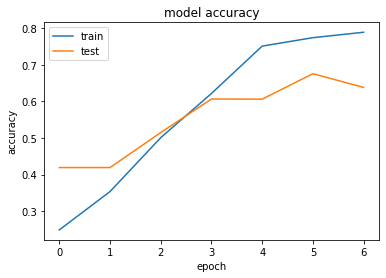

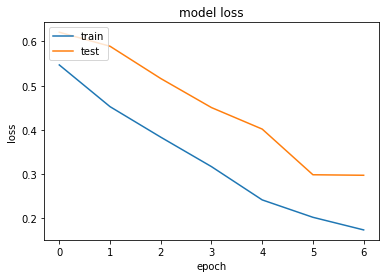

In [34]:
#graph visualization of accuracy and loss
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
